1. import lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

2. load data

In [5]:
data = fetch_california_housing()


In [11]:
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target column
df['Target'] = data.target

In [13]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
# pick a skew featur
target_column = 'AveOccup'
original = df[target_column]


In [17]:
posit_only = original[original>0]

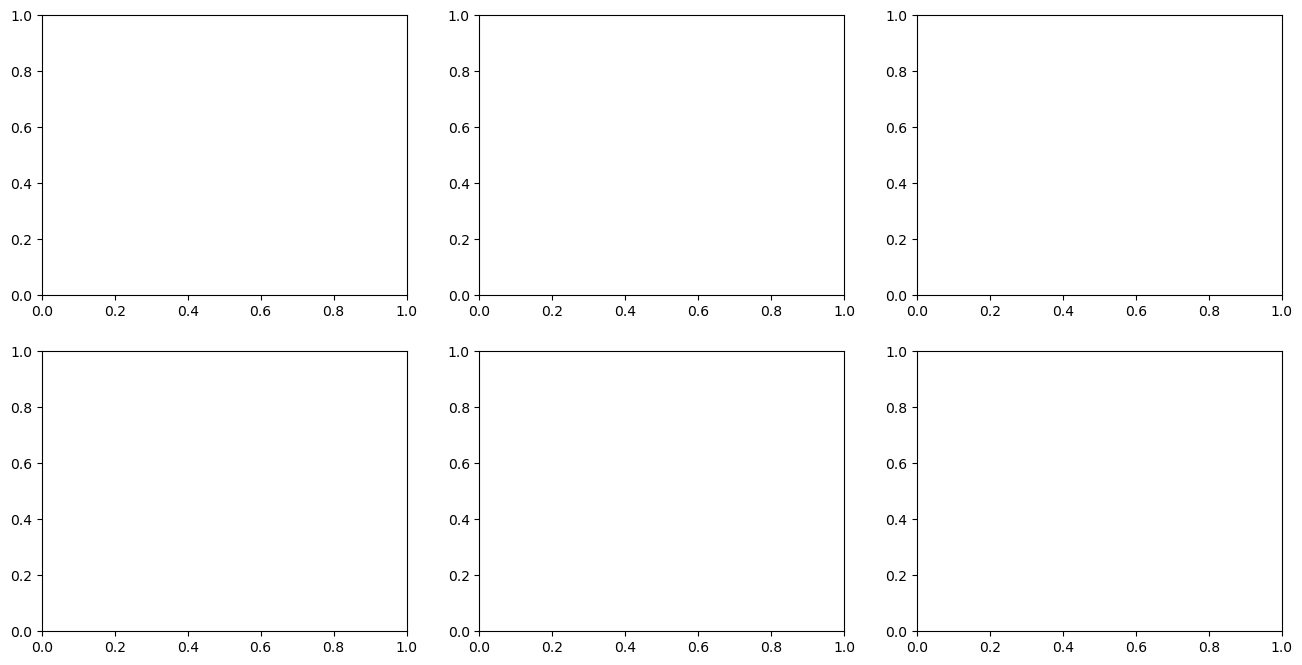

In [21]:
plt.rcParams["figure.figsize"] = (16,8)
fig,ax = plt.subplots(2,3)

In [27]:
from scipy.stats import boxcox, yeojohnson

In [29]:
# 1.log
log_tr = np.log1p(posit_only)

#2. squ roo
sq_tra = np.sqrt(posit_only)

#3. Box-cox
boxcox_tr, boxcox_lambda = boxcox(posit_only)

#4. yeo-j
yej_tra, yeoj_lambda = yeojohnson(original)

#orignial
sns.histplot(original, kde = True, ax = ax[0,0], color = 'lightgray')
ax[0,0].set_title(f"Original:{target_column}")

#log
sns.histplot(log_tr, kde = True, ax = ax[0,1], color = 'blue')
ax[0,1].set_title("log Transformation")

#Sqrt
sns.histplot(sq_tra, kde = True, ax = ax[0,2], color = 'green')
ax[0,2].set_title("sqrt Transformation")

#Boxcox
sns.histplot(boxcox_tr, kde = True, ax = ax[1,0], color = 'orange')
ax[1,0].set_title(f"Box-cox(^ = {boxcox_lambda:.2f})")

#Boxcox
sns.histplot(yej_tra, kde = True, ax = ax[1,1], color = 'purple')
ax[1,1].set_title(f"Yeo-jhon(^ = {yeoj_lambda:.2f})")

ax[1,2].axis('off')

plt.suptitle(f"comparision of non-linear transoformation on '{target_column}'",fontsize = 15 )
plt.subplots_adjust(top=0.9)

plt.show()

<Figure size 1600x800 with 0 Axes>

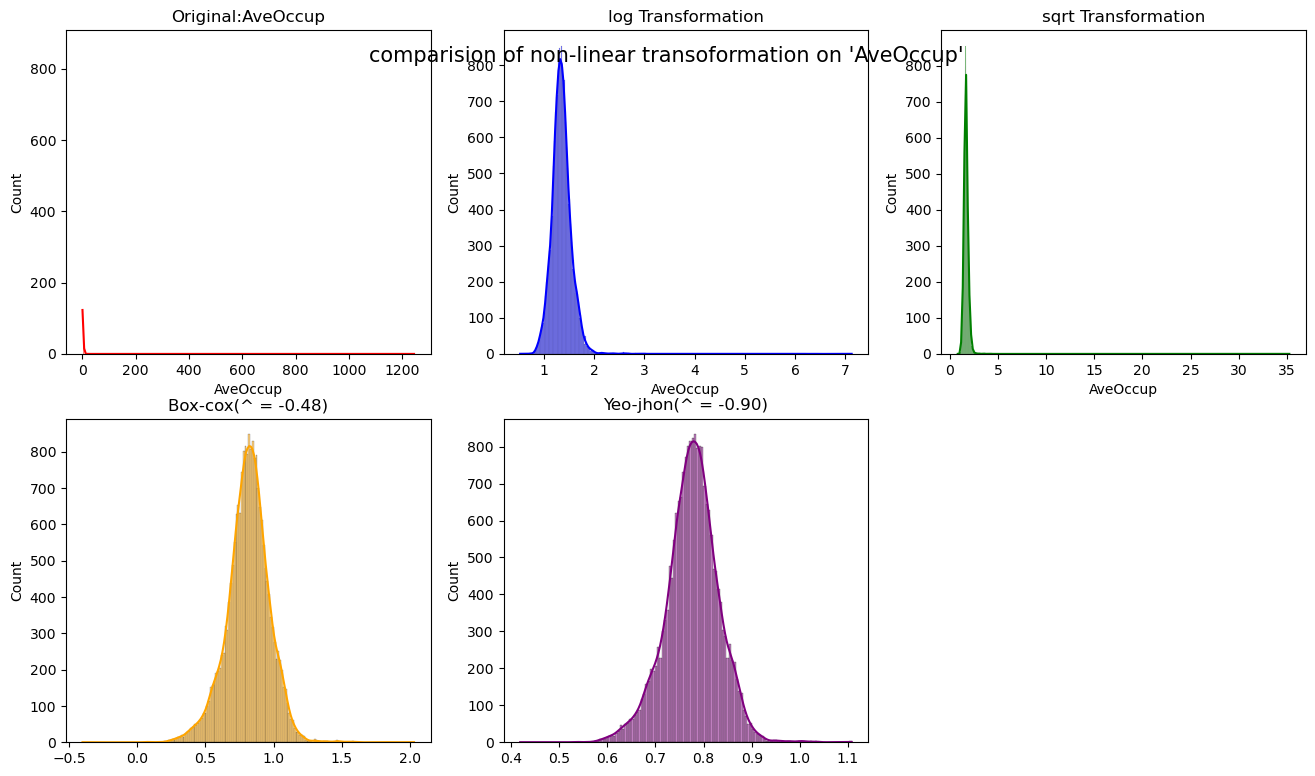

In [35]:
# pick a skew featur
target_column = 'AveOccup'
original = df[target_column]
posit_only = original[original>0]
plt.rcParams["figure.figsize"] = (16,8)
fig,ax = plt.subplots(2,3)
# 1.log
log_tr = np.log1p(posit_only)

#2. squ roo
sq_tra = np.sqrt(posit_only)

#3. Box-cox
boxcox_tr, boxcox_lambda = boxcox(posit_only)

#4. yeo-j
yej_tra, yeoj_lambda = yeojohnson(original)

#orignial
sns.histplot(original, kde = True, ax = ax[0,0], color = 'red')
ax[0,0].set_title(f"Original:{target_column}")

#log
sns.histplot(log_tr, kde = True, ax = ax[0,1], color = 'blue')
ax[0,1].set_title("log Transformation")

#Sqrt
sns.histplot(sq_tra, kde = True, ax = ax[0,2], color = 'green')
ax[0,2].set_title("sqrt Transformation")

#Boxcox
sns.histplot(boxcox_tr, kde = True, ax = ax[1,0], color = 'orange')
ax[1,0].set_title(f"Box-cox(^ = {boxcox_lambda:.2f})")

#Boxcox
sns.histplot(yej_tra, kde = True, ax = ax[1,1], color = 'purple')
ax[1,1].set_title(f"Yeo-jhon(^ = {yeoj_lambda:.2f})")

ax[1,2].axis('off')

plt.suptitle(f"comparision of non-linear transoformation on '{target_column}'",fontsize = 15 )
plt.subplots_adjust(top=1)

plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method ="box-cox")
x_bc = pt.fit_transform(posit_only)

pt = PowerTransformer(method ="yeo-hohnson")
x_yj = pt.fit_transform(x)